 #  <p style="text-align: center;">Technical Support Data Analysis

Technical support data can often be a rich source of information on opportunities for improving customer experience. The lesser the trouble customers have with the product the better. Even better when the customers are able to overcome
technical challenge quickly with minimal effort. Let us analyze the tech support data and do some basic analysis on problem types, time to resolve the problem and channel of support that is most suitable

## Loading the Dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

#import sklearn.metrics

tech_supp_df = pd.read_csv("technical_support_data-2.csv")
tech_supp_df.dtypes

PROBLEM_TYPE              object
no_of_cases                int64
Avg_pending_calls        float64
Avg_resol_time             int64
recurrence_freq          float64
Replace_percent          float64
In_warranty_percent        int64
Post_warranty_percent      int64
dtype: object

The dataset contains one record for each unique problem type. It has metrics for each type like count, average calls to resolve, average resolution time etc.

In [2]:
tech_supp_df.shape

(23, 8)

In [3]:
tech_supp_df.head()


,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


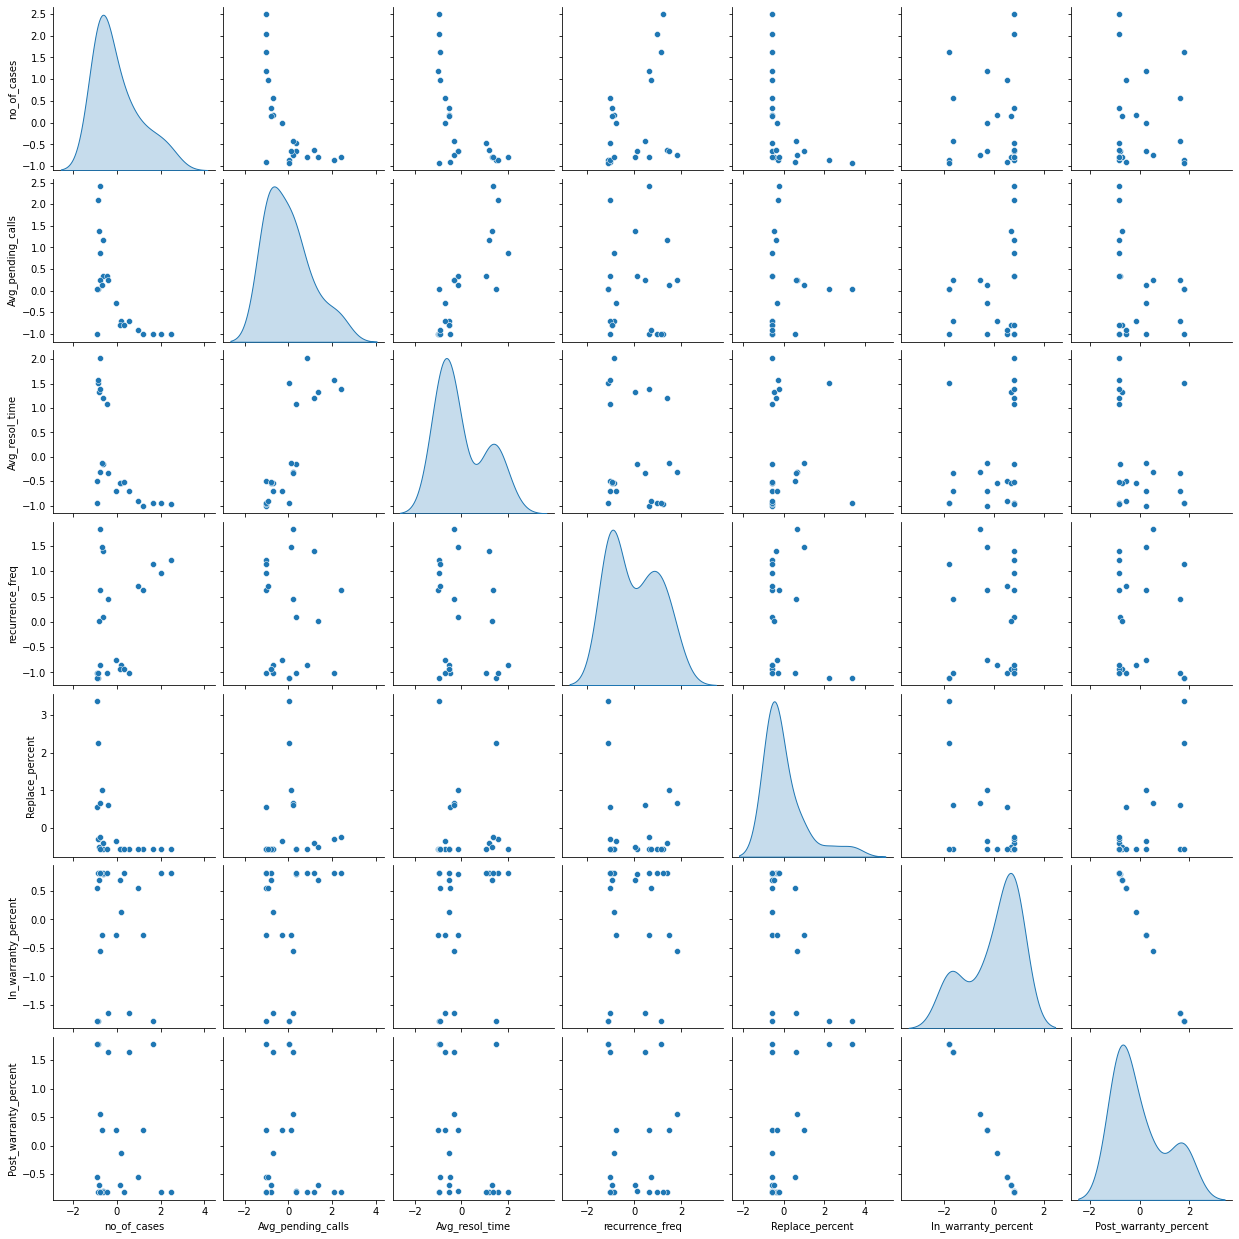

In [4]:
techSuppAttr=tech_supp_df.iloc[:,1:]
techSuppScaled=techSuppAttr.apply(zscore)
sns.pairplot(techSuppScaled,diag_kind='kde')

## Group Data into similar clusters

Now, we will use K-Means clustering to group data based on their attribute. First, we need to determine the optimal number of groups. For that we conduct the knee test to see where the knee happens.

C:\Users\hho1\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

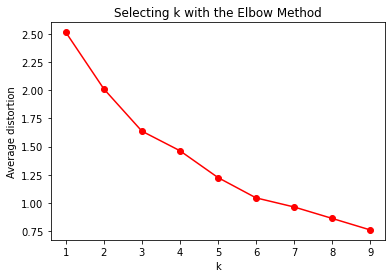

In [5]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(techSuppScaled)
    prediction=model.predict(techSuppScaled)
    meanDistortions.append(sum(np.min(cdist(techSuppScaled, model.cluster_centers_, 'euclidean'), axis=1)) / techSuppScaled.shape[0])


#plt.plot(clusters, meanDistortions, 'bx-')
plt.plot(clusters, meanDistortions, 'r-o')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')



Though the bend is not coming out clearly as there are many bends, let us look at 3 clusters and 5 clusters

In [6]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(techSuppScaled)
prediction=final_model.predict(techSuppScaled)

#Append the prediction 
tech_supp_df["GROUP"] = prediction
techSuppScaled["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df.head()

Groups Assigned : 



,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,1
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,0
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,1
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,0
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,2


In [7]:
tech_supp_df[tech_supp_df["GROUP"]==0]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
1,power chord does not tightly fit,12,2.0,150,0.01,0.50,5,95,0
3,Main switch does not on,3,2.0,8,0.01,0.70,5,95,0
11,Cluttered with popup messages,230,1.3,23,0.02,0.00,10,90,0
16,Motor noise from the system,390,1.0,9,0.27,0.00,5,95,0
20,Battery backup does not get fully charged,29,2.2,45,0.35,0.22,50,50,0
21,Battery does not last full 8 hrs,43,2.1,56,0.31,0.28,60,40,0
22,Fan speed varies at on its own,78,2.2,44,0.19,0.21,10,90,0


In [8]:
tech_supp_df[tech_supp_df["GROUP"]==1]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25,1
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10,1
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5,1
8,Unable to connect the App to the device,321,1.0,5,0.21,0.00,60,40,1
12,AC controller sofware missing,193,1.2,33,0.03,0.00,100,0,1
14,Remote Keys get stuck,450,1.0,8,0.25,0.00,100,0,1
15,Unable to operate menu from remote,520,1.0,7,0.28,0.00,100,0,1
17,Freshner holder stuck,140,1.7,23,0.05,0.04,60,40,1
19,WIFI connectivity breaks,290,1.1,11,0.22,0.00,90,10,1


In [9]:
tech_supp_df[tech_supp_df["GROUP"]==2]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1,2
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0,2
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0,2
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5,2
10,Mobile screen blanks on use of phone,23,4.3,143,0.21,0.06,100,0,2
13,AC remote does not work,24,2.8,180,0.04,0.00,100,0,2
18,Factory settings not working,72,2.3,125,0.02,0.00,100,0,2


### Analyze the distribution of the data among the two groups (K = 3). One of the most informative visual tool is boxplot.


In [10]:
techSuppClust = tech_supp_df.groupby(['GROUP'])
techSuppClust.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,112.142857,1.828571,47.857143,0.165714,0.272857,20.714286,79.285714
1,250.444444,1.166667,20.666667,0.125556,0.026667,85.555556,14.444444
2,35.000000,3.157143,132.571429,0.125714,0.021429,99.142857,0.857143


In [11]:
techSuppScaled

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067,1
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204,0
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696,1
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204,0
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074,2
5,-0.631441,1.171694,1.198266,1.397818,-0.393024,0.822449,-0.822449,2
6,-0.862176,2.108144,1.580322,-1.015573,-0.280732,0.822449,-0.822449,2
7,0.146467,-0.805257,-0.538351,-0.929380,-0.561463,0.685572,-0.685572,1
8,1.174886,-1.013357,-1.007238,0.622085,-0.561463,-0.272563,0.272563,1
9,-0.796251,1.379794,1.337195,0.018738,-0.505317,0.685572,-0.685572,2


array([[<AxesSubplot:title={'center':'Avg_pending_calls'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Avg_resol_time'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'In_warranty_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Post_warranty_percent'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Replace_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'no_of_cases'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'recurrence_freq'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

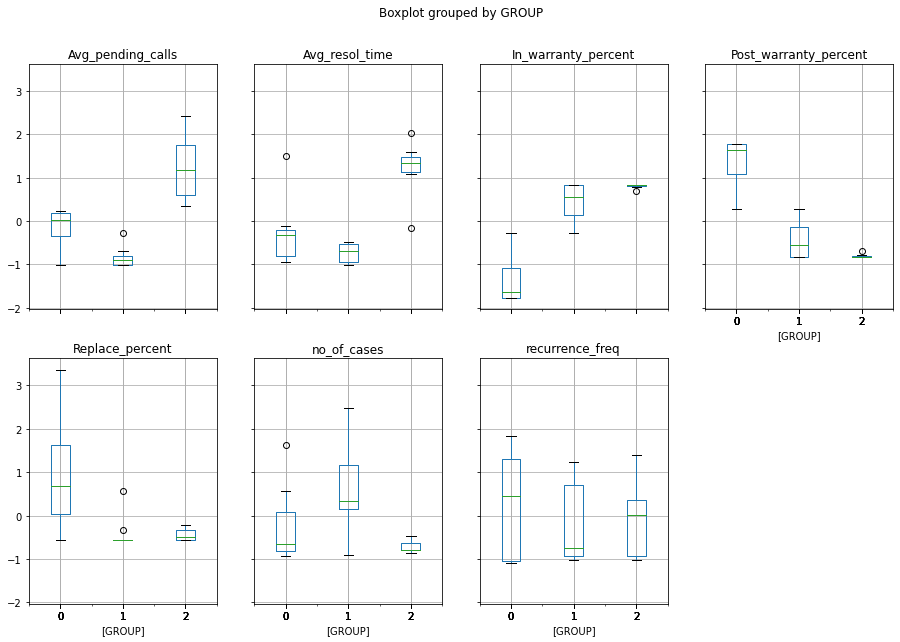

In [12]:
techSuppScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [13]:
#  Let us next try with K = 5, the next elbow point

In [14]:
# Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(techSuppScaled)
prediction=final_model.predict(techSuppScaled)

#Append the prediction 
tech_supp_df["GROUP"] = prediction
techSuppScaled["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df.head()

Groups Assigned : 



,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,1
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,4
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,1
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,4
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,0


In [15]:
tech_supp_df[tech_supp_df["GROUP"]==0]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
4,Forgot mobile app password,45,2.3,54,0.15,0.00,99,1,0
5,AC stops abruptly,47,3.1,132,0.30,0.03,100,0,0
6,App hangs while entring commands,12,4.0,154,0.02,0.05,100,0,0
9,Reinstalling the app hangs the phone,22,3.3,140,0.14,0.01,95,5,0
10,Mobile screen blanks on use of phone,23,4.3,143,0.21,0.06,100,0,0
13,AC remote does not work,24,2.8,180,0.04,0.00,100,0,0
18,Factory settings not working,72,2.3,125,0.02,0.00,100,0,0


In [16]:
tech_supp_df[tech_supp_df["GROUP"]==1]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.00,75,25,1
2,Fan swing not working,5,1.0,35,0.02,0.20,90,10,1
7,App takes a long time to initialize,165,1.2,32,0.03,0.00,95,5,1
12,AC controller sofware missing,193,1.2,33,0.03,0.00,100,0,1
17,Freshner holder stuck,140,1.7,23,0.05,0.04,60,40,1


In [17]:
tech_supp_df[tech_supp_df["GROUP"]==2]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
8,Unable to connect the App to the device,321,1.0,5,0.21,0.0,60,40,2
14,Remote Keys get stuck,450,1.0,8,0.25,0.0,100,0,2
15,Unable to operate menu from remote,520,1.0,7,0.28,0.0,100,0,2
19,WIFI connectivity breaks,290,1.1,11,0.22,0.0,90,10,2


In [18]:
tech_supp_df[tech_supp_df["GROUP"]==3]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
11,Cluttered with popup messages,230,1.3,23,0.02,0.00,10,90,3
16,Motor noise from the system,390,1.0,9,0.27,0.00,5,95,3
20,Battery backup does not get fully charged,29,2.2,45,0.35,0.22,50,50,3
21,Battery does not last full 8 hrs,43,2.1,56,0.31,0.28,60,40,3
22,Fan speed varies at on its own,78,2.2,44,0.19,0.21,10,90,3


In [19]:
tech_supp_df[tech_supp_df["GROUP"]==4]

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,4
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,4


In [21]:
techSuppClust = tech_supp_df.groupby(['GROUP'])
techSuppClust.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,35.00,3.157143,132.571429,0.125714,0.021429,99.142857,0.857143
1,134.60,1.280000,31.000000,0.034000,0.048000,84.000000,16.000000
2,395.25,1.025000,7.750000,0.240000,0.000000,87.500000,12.500000
3,154.00,1.760000,35.400000,0.228000,0.142000,27.000000,73.000000
4,7.50,2.000000,79.000000,0.010000,0.600000,5.000000,95.000000


array([[<AxesSubplot:title={'center':'Avg_pending_calls'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Avg_resol_time'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'In_warranty_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Post_warranty_percent'}, xlabel='[GROUP]'>],
       [<AxesSubplot:title={'center':'Replace_percent'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'no_of_cases'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'recurrence_freq'}, xlabel='[GROUP]'>,
        <AxesSubplot:>]], dtype=object)

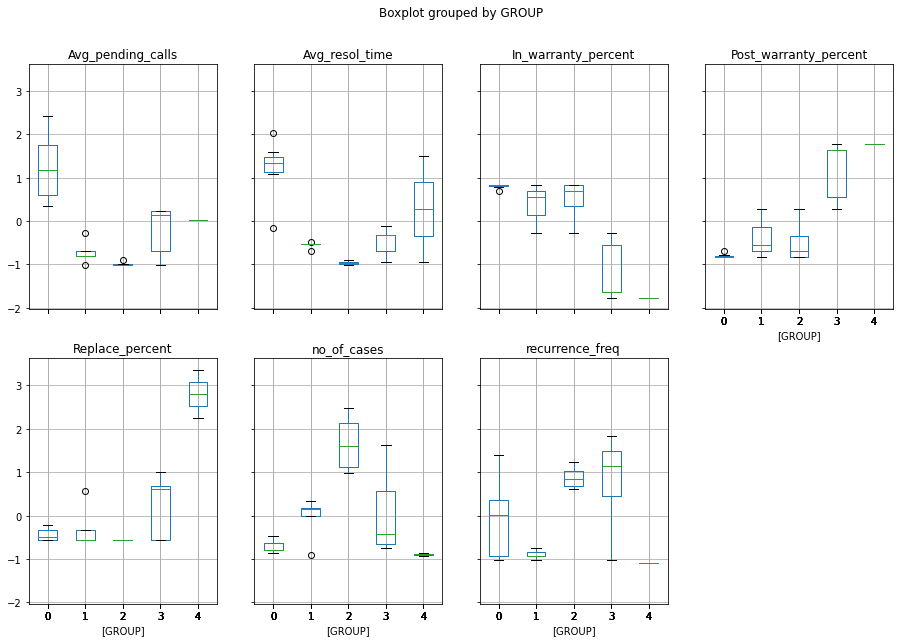

In [22]:
techSuppScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))